# Gathering

In [1]:
# importing liberaries:
import pandas as pd
import numpy as np
import requests as r
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing and testing WeRateDogs twitter archive from file:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Downloading image prediction from UDACITY's servers:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)
name = url.split('/')[-1]
if not os.path.exists(name):
    with open(name, mode='wb') as file:
        file.write(response.content)

In [5]:
# importing and testing image-prediction into dataframe:
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### To_do: create DataFrame with (at minimum) tweet ID, retweet count, and favorite count
1) Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library store each tweet's entire set of JSON data in a file called tweet_json.txt file.

2) read this .txt file line by line into a pandas DataFrame to extract (tweet ID, retweet count, and favorite count).

3) save to dataframe df_tweet_action 

### using tweet_json.txt provided in classroom

In [6]:
#explore tweet-json structure and available data
with open('tweet-json.txt', 'r') as file:
    for line in file:
        explore = json.loads(line)
        break
explore

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
explore.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [8]:
explore['user'].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [9]:
# read tweet_json.txt file and export needed data into df_api_info:
#collecting tweet ID, retweet count, and favorite count from twitter_json data
import json
_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        tweet_txt = tweet['full_text']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        quote_status = tweet['is_quote_status']
        created_at = tweet['created_at']
        user_count = tweet['user']['followers_count']
        #append to list 
        _list.append({'tweet_id': str(tweet_id),'favorite_count': int(favorite_count),
                      'retweet_count': int(retweet_count),'created_at': created_at,
                      'user_count': user_count,'quote_status': quote_status
                     })
        tweet_json = pd.DataFrame(_list, columns = ['tweet_id', 'favorite_count','retweet_count',
                                                    'created_at','user_count'])
#create DataFrame
df_api_info = pd.DataFrame(_list)
df_api_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   user_count      2354 non-null   int64 
 5   quote_status    2354 non-null   bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 94.4+ KB


# Assess

1) Assess visually
2) Assess programatically
3) record tidiness and quality issues

### First: data collected from twitter archive

In [10]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
archive_df.loc[[313,2335,516,387,45,784,1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [12]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_api_info.sample(20)

,tweet_id,favorite_count,retweet_count,created_at,user_count,quote_status
2163,669367896104181761,485,172,Wed Nov 25 04:11:57 +0000 2015,3201012,False
532,807621403335917568,16236,4288,Sat Dec 10 16:22:02 +0000 2016,3200896,False
2054,671357843010908160,426,157,Mon Nov 30 15:59:17 +0000 2015,3201007,False
806,771908950375665664,7298,2181,Sat Sep 03 03:13:29 +0000 2016,3200905,True
2041,671536543010570240,1253,441,Tue Dec 01 03:49:23 +0000 2015,3201007,False
1572,687480748861947905,1760,281,Thu Jan 14 03:45:57 +0000 2016,3200951,False
2132,670069087419133954,676,278,Fri Nov 27 02:38:14 +0000 2015,3201010,False
1504,691756958957883396,3179,1161,Mon Jan 25 22:58:05 +0000 2016,3200950,False
2230,668221241640230912,537,215,Sun Nov 22 00:15:33 +0000 2015,3201015,False
513,811627233043480576,14265,3650,Wed Dec 21 17:39:46 +0000 2016,3200895,False


In [15]:
df_api_info.describe()

,favorite_count,retweet_count,user_count
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,3.200942e+06
std,11814.771334,5284.770364,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,1415.000000,624.500000,3.200898e+06
50%,3603.500000,1473.500000,3.200945e+06
75%,10122.250000,3652.000000,3.200953e+06
max,132810.000000,79515.000000,3.201018e+06


In [16]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [18]:
df_image_predictions.p1_dog.equals(df_image_predictions.p2_dog)

False

In [19]:
sum(archive_df.duplicated()) , sum(df_image_predictions.duplicated()), sum(df_api_info.duplicated())

(0, 0, 0)

## Data Quality issues: 'required min 8'

- **archive_df:**
    - remove retweets with retweet status id
    - remove reply tweets with reply status id
    - remove unwanted 6 columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.
    - missing dog names.
    - index 45:'883482846933004288', 784:'775096608509886464', 1068:'740373189193256964',716439118184652801,722974582966214656 misread & index 387:'826598799820865537','682962037429899265' joke misinterpreted
    - invalid rating at index 313:'835246439529840640',2335:'666287406224695296',516:'810984652412424192')
    - index 200, 460, 950, 575 doggo, floofer, pupper, puppo type wronge.
    - missing data in expanded url can be collected from tweet-json.txt index
    - Data type error: tweet_id, retweeted_status_id, timestamp should be datetime 
    - 20 tweets with different rating denominator (not 10).

    
- **remove tweets with no images.**
- **some tweets have more one https in their url column**
- **df_image_predictions:**
    - 3 columns for the same variable 
    - rename non descriptive column names
    - some of dog breed names in column is lowercase
- **df_api_info:**
    - remove quote tweets


## Data tidiness issues: 'required min 2'


- **doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify the stage of dog.**
- **Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.**

     

tweets with dog photo and low rating that contain alcohol, wine, beer ,

# clean

In [20]:
# make a copy of each DataFrame
archive_clean = archive_df.copy()
image_prediction_clean = df_image_predictions.copy()
api_info_clean = df_api_info.copy()

## archive_df:

- remove retweets with retweet status id
    - **define:** filter out rows with value in retweeted_status_id
- remove reply tweets with reply status id
    - **define:** filter out rows with value in in_reply_to_status_id.

In [21]:
# filter out rows with value in retweeted_status_id
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()].index, inplace = True)
# filter out rows with value in in_reply_to_status_id
archive_clean.drop(archive_clean[archive_clean['in_reply_to_status_id'].notnull()].index, inplace = True)

**Test**

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

- remove unwanted columns:
    - **define:** 
        - create list of un wanted columns: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
        - remove using df.drop()
        - test by listing columns

In [23]:
#create list:
unwanted_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',
                    'retweeted_status_user_id', 'retweeted_status_timestamp']
# drop columns:
archive_clean.drop(unwanted_columns, axis=1 , inplace=True)
#test:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

- index 45:'883482846933004288', 784:'775096608509886464', 1068:'740373189193256964',716439118184652801 , 722974582966214656 misread & index 387:'826598799820865537' 682962037429899265, joke misinterpreted
- invalid rating at index 313:'835246439529840640',2335:'666287406224695296',516:'810984652412424192')
    - **define:** create list with wrong_rating_id
        - view rows to be modified to check if any were deleted
        - create dictionary of key = tweet id , value = correct rating
        - replace wrong rating with the wright ones
        

In [24]:
# creat list with tweet_id of tweets with wrong rating
wrong_rating_id = [883482846933004288, 775096608509886464, 740373189193256964, 826598799820865537,
                   682962037429899265,716439118184652801, 722974582966214656 ]
invalid_rating_id = [835246439529840640, 666287406224695296, 810984652412424192]
_id = wrong_rating_id+invalid_rating_id
archive_clean.loc[archive_clean['tweet_id'].isin(_id) ]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


3 of wrong entries were deleted with retweets and replies

In [25]:
rating_correction = {45:(13.5,10) , 516:(0,0) , 1068:(14,10) , 2335:(9,10) , 1662:(10,10) ,
                     1202:(11,10) , 1165:(13,10)}
for key, value in rating_correction.items():
    archive_clean.rating_numerator.loc[key] = value[0]
    archive_clean.rating_denominator.loc[key] = value[1]

- drop row index 516: tweet have no rating

In [26]:
archive_clean.drop(516, inplace = True)


In [27]:
#test
archive_clean.loc[archive_clean['tweet_id'].isin(_id) ]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.0,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.0,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.0,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.0,10,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,None,None,None,None


- wrong datatype in columnstweet_id , timestamp 
    - **define:** change datatype using str() and pd.to_datetime()

In [28]:
#change tweet_id to string:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
#change timestamp type:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   text                2096 non-null   object             
 3   expanded_urls       2093 non-null   object             
 4   rating_numerator    2096 non-null   float64            
 5   rating_denominator  2096 non-null   int64              
 6   name                2096 non-null   object             
 7   doggo               2096 non-null   object             
 8   floofer             2096 non-null   object             
 9   pupper              2096 non-null   object             
 10  puppo               2096 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(8)
memory usage: 196.5+ KB


## join dataframes
- same observational unit in two tables: archive_clean, image_prediction_clean
- **define:** merge two dataframes with pd.merge()

In [29]:
tweet_data_complete = pd.merge(archive_clean, api_info_clean, on=['tweet_id'] , how='left')

In [30]:
tweet_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   text                2096 non-null   object             
 3   expanded_urls       2093 non-null   object             
 4   rating_numerator    2096 non-null   float64            
 5   rating_denominator  2096 non-null   int64              
 6   name                2096 non-null   object             
 7   doggo               2096 non-null   object             
 8   floofer             2096 non-null   object             
 9   pupper              2096 non-null   object             
 10  puppo               2096 non-null   object             
 11  favorite_count      2096 non-null   int64              
 12  retweet_count       2096 non-null 

In [31]:
tweet_data_complete['jpg_url']= image_prediction_clean['jpg_url']

- remove tweets with no images.
- **define:** remove tweets with jpg_url is null

In [32]:
#code: use df.drop()
tweet_data_complete.drop(tweet_data_complete[tweet_data_complete['jpg_url'].isnull()].index, inplace = True)
#test:
tweet_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   text                2075 non-null   object             
 3   expanded_urls       2072 non-null   object             
 4   rating_numerator    2075 non-null   float64            
 5   rating_denominator  2075 non-null   int64              
 6   name                2075 non-null   object             
 7   doggo               2075 non-null   object             
 8   floofer             2075 non-null   object             
 9   pupper              2075 non-null   object             
 10  puppo               2075 non-null   object             
 11  favorite_count      2075 non-null   int64              
 12  retweet_count       2075 non-null 

- doggo, floofer, pupper, puppo: 4 columns , one variable
- **define**
    - remove none entries in each columns
    - create new column 'dog_stage' with data from all 4 columns
    - delete old stage columns 

In [33]:
# remove 'None' entries in each columns
tweet_data_complete['doggo'].replace('None', '', inplace=True)
tweet_data_complete['floofer'].replace('None', '', inplace=True)
tweet_data_complete['pupper'].replace('None', '', inplace=True)
tweet_data_complete['puppo'].replace('None', '', inplace=True)
#create new column
tweet_data_complete['dog_stage'] = (tweet_data_complete['doggo'] + 
                                    tweet_data_complete['floofer'] + 
                                    tweet_data_complete['pupper'] + 
                                    tweet_data_complete['puppo'])
#fill missing data:
tweet_data_complete['dog_stage'].replace('', 'unknown', inplace=True)
#drop columns
drop_col = ['doggo','floofer','pupper','puppo']
tweet_data_complete.drop(drop_col, axis=1 , inplace=True)


In [34]:
tweet_data_complete['dog_stage'].value_counts()

unknown         1739
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

- Quote tweets are not original tweets
    - **define:** 
        - remove tweets with quote_status == True
        - drop quote_status column

In [35]:
tweet_data_complete.quote_status.value_counts()

False    2046
True       29
Name: quote_status, dtype: int64

In [36]:
#drop tweets with quote_status==True
tweet_data_complete.drop(tweet_data_complete[tweet_data_complete['quote_status']== True].index, inplace = True)
#drop quote_status column
tweet_data_complete.drop('quote_status', axis=1 , inplace=True)
#test
tweet_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2046 non-null   object             
 1   timestamp           2046 non-null   datetime64[ns, UTC]
 2   text                2046 non-null   object             
 3   expanded_urls       2043 non-null   object             
 4   rating_numerator    2046 non-null   float64            
 5   rating_denominator  2046 non-null   int64              
 6   name                2046 non-null   object             
 7   favorite_count      2046 non-null   int64              
 8   retweet_count       2046 non-null   int64              
 9   created_at          2046 non-null   object             
 10  user_count          2046 non-null   int64              
 11  jpg_url             2046 non-null   object             
 12  dog_stage           2046 non-null 

- timestamp and created_at columns represent same data
    - **define:**
        - remove timestamp column
        - change created_at to datetime

In [37]:
#remove timestamp column
tweet_data_complete.drop('timestamp', axis=1 , inplace=True)
#change created_at dtype
tweet_data_complete.created_at = pd.to_datetime(tweet_data_complete.created_at )

In [38]:
#test
tweet_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2046 non-null   object             
 1   text                2046 non-null   object             
 2   expanded_urls       2043 non-null   object             
 3   rating_numerator    2046 non-null   float64            
 4   rating_denominator  2046 non-null   int64              
 5   name                2046 non-null   object             
 6   favorite_count      2046 non-null   int64              
 7   retweet_count       2046 non-null   int64              
 8   created_at          2046 non-null   datetime64[ns, UTC]
 9   user_count          2046 non-null   int64              
 10  jpg_url             2046 non-null   object             
 11  dog_stage           2046 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

- **image_prediction_clean**
    - rename non descriptive column names
    - some of dog breed names in column is lowercase
- there are 3 predictions of every image 
- we are going to use the p1 prediction with the highest prediction confidence
- join p1 and p1_dog to tweet_data_complete 
- **define:**
    - copy columns p1 and p1_dog to tweet_data_complete
    - rename columns p1,  p1_dog
    - fix lower case with .tilte() p1 

In [39]:
#copy columns from image_prediction_clean with changing to descriptive name
tweet_data_complete['is_dog_image'] = image_prediction_clean['p1_dog']
tweet_data_complete['dog_breed_prediction'] = image_prediction_clean['p1'].str.title()

In [40]:
#test
tweet_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2046 non-null   object             
 1   text                  2046 non-null   object             
 2   expanded_urls         2043 non-null   object             
 3   rating_numerator      2046 non-null   float64            
 4   rating_denominator    2046 non-null   int64              
 5   name                  2046 non-null   object             
 6   favorite_count        2046 non-null   int64              
 7   retweet_count         2046 non-null   int64              
 8   created_at            2046 non-null   datetime64[ns, UTC]
 9   user_count            2046 non-null   int64              
 10  jpg_url               2046 non-null   object             
 11  dog_stage             2046 non-null   object             
 12  is_dog

In [41]:
tweet_data_complete.dog_breed_prediction.sample(15)

1690               Border_Collie
1681              French_Bulldog
1999          Labrador_Retriever
1171                         Cup
372                       Wombat
472           Labrador_Retriever
1550          Labrador_Retriever
1920                   Chihuahua
978                      Samoyed
2057            Golden_Retriever
822               Cocker_Spaniel
1203    Chesapeake_Bay_Retriever
51                          Swab
532     Chesapeake_Bay_Retriever
497                       Beagle
Name: dog_breed_prediction, dtype: object

In [42]:
tweet_data_complete.dog_breed_prediction.value_counts()

Golden_Retriever      149
Labrador_Retriever     99
Pembroke               88
Chihuahua              81
Pug                    56
                     ... 
Soccer_Ball             1
Cheeseburger            1
Studio_Couch            1
Lorikeet                1
Agama                   1
Name: dog_breed_prediction, Length: 375, dtype: int64

# save clean data

In [43]:
tweet_data_complete.to_csv('twitter_archive_master.csv', index=False)

# Data Analysis
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [44]:
# load DataFrame and fix category and Datetime format
archive_master = pd.read_csv('twitter_archive_master.csv')
archive_master.created_at = pd.to_datetime(archive_master.created_at )
archive_master.dog_stage = archive_master.dog_stage.astype('category')
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2046 non-null   int64              
 1   text                  2046 non-null   object             
 2   expanded_urls         2043 non-null   object             
 3   rating_numerator      2046 non-null   float64            
 4   rating_denominator    2046 non-null   int64              
 5   name                  2046 non-null   object             
 6   favorite_count        2046 non-null   int64              
 7   retweet_count         2046 non-null   int64              
 8   created_at            2046 non-null   datetime64[ns, UTC]
 9   user_count            2046 non-null   int64              
 10  jpg_url               2046 non-null   object             
 11  dog_stage             2046 non-null   category           
 12  is_dog

In [45]:
archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,user_count
count,2.046000e+03,2046.000000,2046.000000,2046.000000,2046.000000,2.046000e+03
mean,7.360988e+17,12.217253,10.439883,8971.636852,2850.594819,3.200945e+06
std,6.652765e+16,40.850989,6.663557,12169.922201,4732.239673,4.373784e+01
min,6.662939e+17,0.000000,10.000000,107.000000,23.000000,3.200799e+06
25%,6.769486e+17,10.000000,10.000000,2091.250000,656.000000,3.200901e+06
50%,7.094844e+17,11.000000,10.000000,4195.500000,1407.500000,3.200947e+06
75%,7.859140e+17,12.000000,10.000000,11355.250000,3278.000000,3.201000e+06
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,3.201018e+06


- which dog breed get most interactions
- which dog stage gets most interactions
- how is images with no dogs affect rating
- how does rating affect interaction
- type of relation between follower count and retweet and favorite count

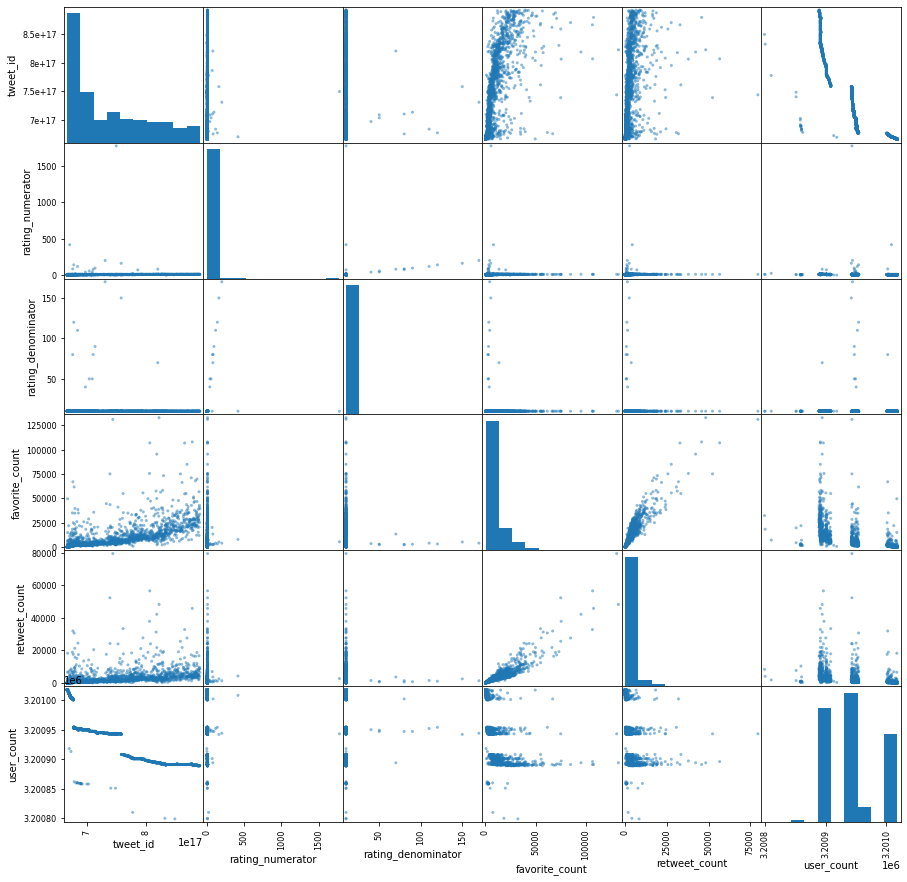

In [46]:
pd.plotting.scatter_matrix(archive_master.iloc[:, :-2], figsize=(15,15))
plt.savefig('scatter_plot.png',bbox_inches='tight')

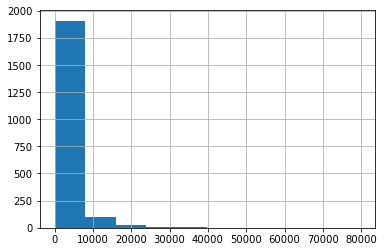

In [47]:
archive_master.retweet_count.hist();

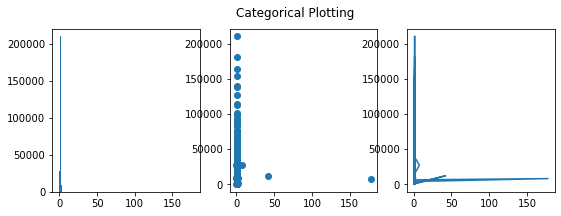

In [48]:
names = archive_master.rating_numerator / archive_master.rating_denominator
values = interaction = archive_master.favorite_count + archive_master.retweet_count

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [49]:
archive_master.groupby(["dog_stage"])["retweet_count"].mean()

dog_stage
doggo            6747.449275
doggofloofer     3433.000000
doggopupper      4237.666667
doggopuppo      19196.000000
floofer          4155.888889
pupper           2506.744292
puppo            6600.043478
unknown          2663.436735
Name: retweet_count, dtype: float64

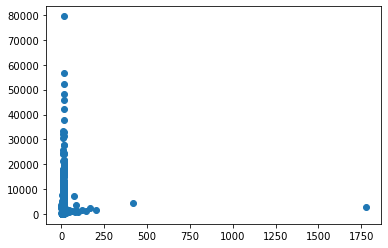

In [50]:
sns.set_context()
plt.scatter(archive_master.rating_numerator, archive_master.retweet_count);

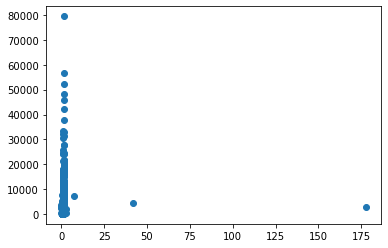

In [51]:
archive_master['rating_ratio']=archive_master.rating_numerator / archive_master.rating_denominator
sns.set_context()
plt.scatter(archive_master.rating_ratio, archive_master.retweet_count);

In [52]:
#identify outliers and capture then into separate dataframe
ratio_outliers = archive_master[archive_master.rating_ratio > 4]
#create list with all outliers index
ratio_outliers_index = ratio_outliers.index.tolist()
#remove outliers index rows from the original dataframe
archive_master.drop(ratio_outliers_index, inplace=True)

In [53]:
#remove rating 0
ratio_outliers_index2 = archive_master.rating_ratio.idxmin()
archive_master.drop(ratio_outliers_index2, inplace = True)


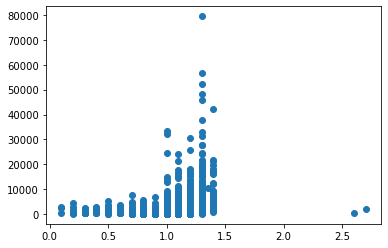

In [54]:
sns.set_context()
plt.scatter(archive_master.rating_ratio, archive_master.retweet_count);
plt.savefig('scatter_rating_ratio_retweet_count.png',bbox_inches='tight')

In [55]:
#create new columns to with boolean True and False to study relation between dog name and rating and interactions
archive_master['has_name']= archive_master['name'] != 'None'
archive_master['has_name'].value_counts()

True     1480
False     562
Name: has_name, dtype: int64

In [57]:
#create new column with sum favorite an retweet
archive_master['interactions']= archive_master.favorite_count + archive_master.retweet_count

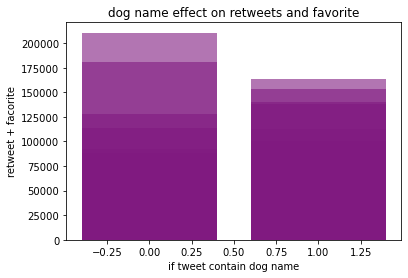

<Figure size 432x288 with 0 Axes>

In [58]:
# set data
x = archive_master.has_name
y = archive_master.interactions

# Create bars and choose color
plt.bar(x, y, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('dog name effect on retweets and favorite')
plt.xlabel('if tweet contain dog name')
plt.ylabel('retweet + facorite') 
 
# Show graphic
plt.show()

# save fig.
plt.savefig('dog name effect on retweets and favorite.png')

#### tweets with dog name has roughly the same average rating

In [59]:
archive_master.groupby(['dog_stage']).describe()

tweet_id                                                          \
                count          mean           std           min           25%   
dog_stage                                                                       
doggo            69.0  7.942417e+17  4.446550e+16  7.160809e+17  7.526821e+17   
doggofloofer      1.0  8.540102e+17           NaN  8.540102e+17  8.540102e+17   
doggopupper       9.0  7.755001e+17  3.050515e+16  7.331095e+17  7.515838e+17   
doggopuppo        1.0  8.558515e+17           NaN  8.558515e+17  8.558515e+17   
floofer           9.0  7.558218e+17  6.012909e+16  6.853075e+17  7.338223e+17   
pupper          219.0  7.185043e+17  5.490658e+16  6.721600e+17  6.801233e+17   
puppo            23.0  8.079175e+17  4.958257e+16  7.385375e+17  7.686037e+17   
unknown        1711.0  7.345333e+17  6.702747e+16  6.662939e+17  6.754991e+17   

                                                       rating_numerator  \
                       50%           75%           max            count   
dog_stage                                                                 
doggo         7.964848e+17  8.283816e+17  8.902403e+17             69.0   
doggofloofer  8.540102e+17  8.540102e+17  8.540102e+17              1.0   
doggopupper   7.813081e+17  8.011151e+17  8.177777e+17              9.0   
doggopuppo    8.558515e+17  8.558515e+17  8.558515e+17              1.0   
floofer       7.465429e+17  7.762182e+17  8.833607e+17              9.0   
pupper        6.936300e+17  7.412103e+17  8.863661e+17            219.0   
puppo         8.022393e+17  8.425714e+17  8.896654e+17             23.0   
unknown       7.079958e+17  7.844745e+17  8.924206e+17           1711.0   

                         ... rating_ratio      interactions                \
                   mean  ...          75%  max        count          mean   
dog_stage                ...                                                
doggo         11.826087  ...          1.3  1.4         69.0  25017.072464   
doggofloofer  11.000000  ...          1.1  1.1          1.0  20602.000000   
doggopupper   11.111111  ...          1.2  1.3          9.0  16874.555556   
doggopuppo    13.000000  ...          1.3  1.3          1.0  67040.000000   
floofer       11.888889  ...          1.3  1.3          9.0  15220.333333   
pupper        10.794521  ...          1.2  2.7        219.0   9812.872146   
puppo         12.000000  ...          1.3  1.4         23.0  28222.608696   
unknown       11.127119  ...          1.2  2.6       1711.0  11228.192285   

                                                                          
                       std      min      25%      50%      75%       max  
dog_stage                                                                 
doggo         33531.495489   3318.0   9025.0  15901.0  24358.0  210590.0  
doggofloofer           NaN  20602.0  20602.0  20602.0  20602.0   20602.0  
doggopupper   17210.212725   6114.0  10934.0  11421.0  13862.0   62240.0  
doggopuppo             NaN  67040.0  67040.0  67040.0  67040.0   67040.0  
floofer       15837.254742   2136.0   5156.0   8585.0  16350.0   51842.0  
pupper        14166.775018    796.0   3164.5   4611.0  10439.0  139710.0  
puppo         37361.698996   3993.0   8677.5  17680.0  27992.0  181075.0  
unknown       14991.945456    130.0   2492.0   5325.0  14223.5  163640.0  

[8 rows x 64 columns]

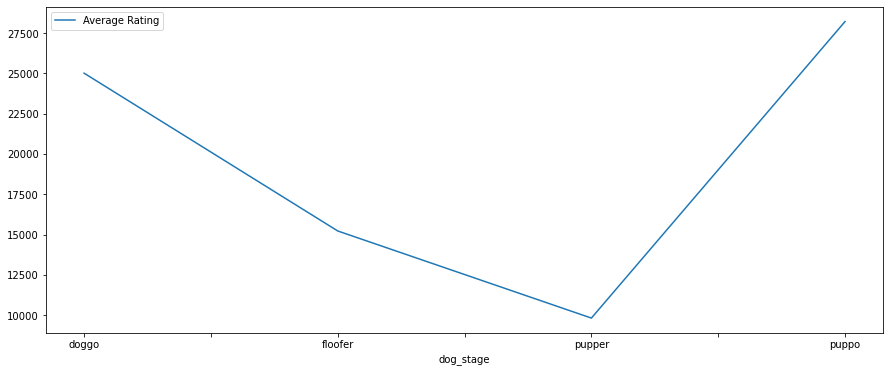

In [60]:
# which dog stage gets most interactions and ratings
# group by dog_stage and save to new dataframe
stage_df = archive_master.groupby(['dog_stage'])['interactions'].describe()
# drop rows that represent more than one stage
stage_df.drop(['unknown','doggofloofer','doggopupper','doggopuppo'], axis=0 ,inplace=True)
# create plot
stage_df.plot(y='mean', use_index=True, figsize=(15,6), label='Average Rating')
# save fig
plt.savefig('Dog_stage_vs_rating.png')

#### images with puppo dogs in it have higher ratings

In [61]:
# how is tweets with no dogs rated 
# group by is_dog_image and save to new dataframe
is_dog_df = archive_master.groupby(['is_dog_image'])['rating_ratio'].describe()

#

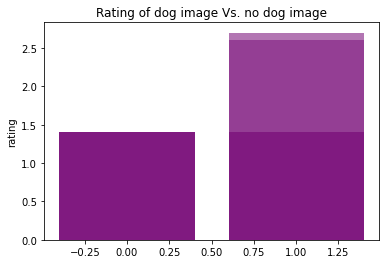

<Figure size 432x288 with 0 Axes>

In [62]:
#how is tweets with no dogs rated 
# set data
x = archive_master.is_dog_image
y = archive_master.rating_ratio
x_p = ('False','True')
# Create bars and choose color
plt.bar(x, y, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Rating of dog image Vs. no dog image')
plt.xlabel('')
plt.ylabel('rating') 

# Show graphic
plt.show()

# save fig.
plt.savefig('dog vs no dog.png')

In [63]:

archive_master.groupby(['is_dog_image'])['interactions'].describe()

,count,mean,std,min,25%,50%,75%,max
is_dog_image,,,,,,,,
False,530.0,13519.803774,17400.607292,256.0,3534.75,7657.0,16856.75,181075.0
True,1512.0,11208.170635,16280.750164,130.0,2528.00,5133.0,13529.75,210590.0


In [64]:
archive_master.retweet_count.describe()

count     2042.000000
mean      2847.555828
std       4735.822441
min         23.000000
25%        654.500000
50%       1404.000000
75%       3264.000000
max      79515.000000
Name: retweet_count, dtype: float64

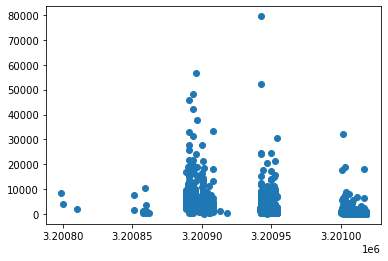

In [65]:
sns.set_context()
plt.scatter(archive_master.user_count, archive_master.retweet_count);

- favorit and retweet count are highly affected by follower count

In [66]:
#create new column relative_interaction 
archive_master['relative_interactions']= 1000 *(archive_master.favorite_count + archive_master.retweet_count)/ archive_master.user_count 
archive_master.groupby(['is_dog_image'])['relative_interactions'].describe()

,count,mean,std,min,25%,50%,75%,max
is_dog_image,,,,,,,,
False,530.0,4.223736,5.436164,0.079975,1.104282,2.392103,5.266266,56.570133
True,1512.0,3.501551,5.086296,0.040612,0.789752,1.603572,4.226831,65.789988


- images with no dog have higher retweet an favorite count

In [67]:
archive_master['dog_breed_prediction'].value_counts()

Golden_Retriever      149
Labrador_Retriever     99
Pembroke               88
Chihuahua              80
Pug                    56
                     ... 
Lorikeet                1
Clumber                 1
Dining_Table            1
Bald_Eagle              1
Quilt                   1
Name: dog_breed_prediction, Length: 374, dtype: int64

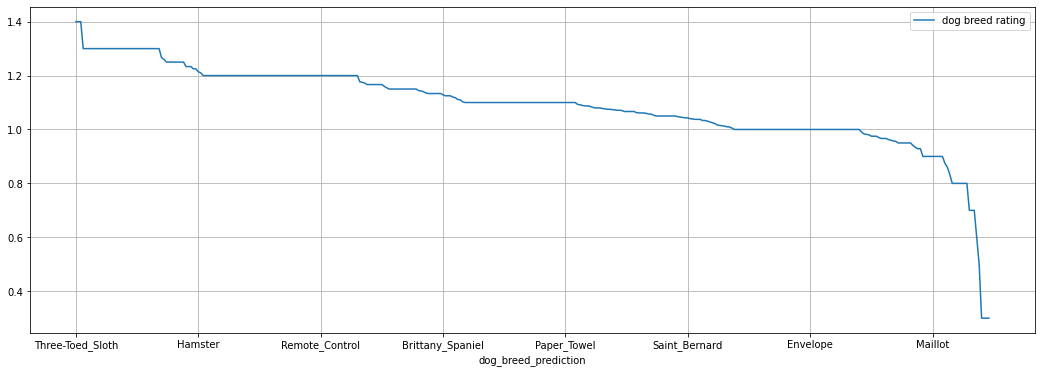

In [68]:
# which dog breed gets most interactions and ratings
# group by dog_breed_prediction and save to new dataframe
breed_df = archive_master.groupby(['dog_breed_prediction'])['rating_ratio'].describe()
breed_df.sort_values('mean',axis=0, inplace=True, ascending=False)
# create plot
breed_df.plot(y='mean', use_index=True, figsize=(18,6), label='dog breed rating', grid= True, sort_columns=True)
# save fig
plt.savefig('Dog_breed_rating.png')

In [69]:
breed_df['mean'].idxmax()

'Three-Toed_Sloth'

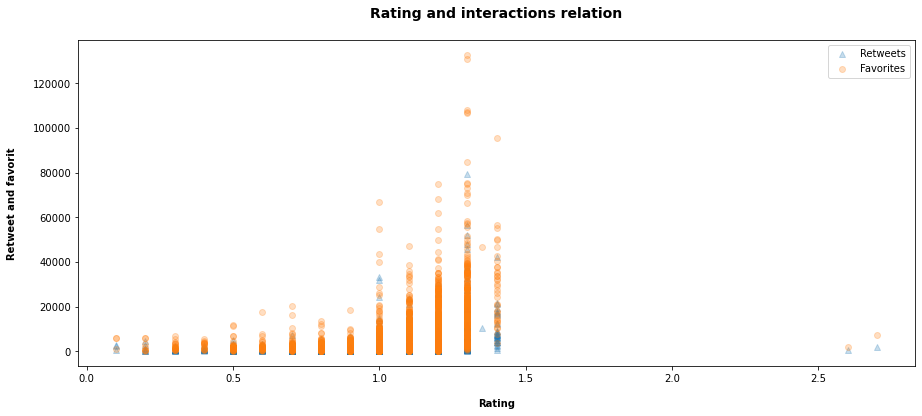

In [70]:
plt.subplots(figsize=(15, 6))
plt.scatter(archive_master.rating_ratio, archive_master.retweet_count,marker='^',alpha=0.25 ,label="Retweets")
plt.scatter(archive_master.rating_ratio, archive_master.favorite_count,marker='o', alpha=0.25,label="Favorites")

# add title and axis names
plt.title('Rating and interactions relation\n', fontsize=14, weight='bold')
plt.xlabel('\nRating', weight='bold')
plt.ylabel('Retweet and favorit\n', weight='bold')
plt.legend();
plt.savefig('Rating and interactions relation.png')

- tweets with high ratings gets more interactions

# Analysis insights:
- tweets with high ratings gets more interactions
- images with no dog have higher retweet an favorite count
- favorit and retweet count are highly affected by follower count
- images with puppo dogs in it have higher ratings
- tweets with dog name have higher retweet count and favorite count
- African_Hunting_Dog is the most rated dog

In [71]:
# save modified DataFrame:
archive_master.to_csv('twitter_archive_master.csv', index=False)